In [26]:
from typing_extensions import TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from operator import add
from typing import Annotated

In [40]:
def reduce_list(left: list | None, right: list | None) -> list:
    """Safely combine two lists, handling cases where either or both inputs might be None.

    Args:
        left (list | None): The first list to combine, or None.
        right (list | None): The second list to combine, or None.


    Returns:
        list: A new list containing all elements from both input lists.
            If an input is None, it's treated as an empty list.
    """
    if not left:
        left = []
    if not right:
        right = []
    return left + right

class DefaultState(TypedDict):
    foo: Annotated[list[int], add]

class CustomReducerState(TypedDict):
    foo: Annotated[list[int], reduce_list]

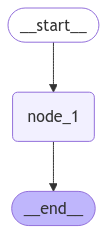

In [44]:
class State(TypedDict):
    foo: Annotated[list[int], add]

def node_1(state):
    print("---Node 1---")
    return {"foo": [2]}

# def node_2(state):
#     print("---Node 2---")
#     return {"foo": [state['foo'][-1] + 1]}

# def node_3(state):
#     print("---Node 3---")
#     return {"foo": [state['foo'][-1] + 1]}

builder = StateGraph(CustomReducerState)
builder.add_node("node_1", node_1)
# builder.add_node("node_2", node_2)
# builder.add_node("node_3", node_3)

builder.add_edge(START, "node_1")
builder.add_edge("node_1", END)
# builder.add_edge("node_1", "node_2")
# builder.add_edge("node_1", "node_3")
# builder.add_edge("node_2", END)
# builder.add_edge("node_3", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))



In [45]:
try:
    print(graph.invoke({"foo" : None }))
except TypeError as e:
    print(f"Error occurred: {e}")

---Node 1---
{'foo': [2]}


In [30]:
graph.invoke({"foo" : [1]})

---Node 1---
---Node 2---
---Node 3---


{'foo': [1, 2, 3, 3]}

# MESSAGES

In [ ]:
from typing import Annotated
from langgraph.graph import MessagesState
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages

class CustomMessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    added_key_1: str
    added_ket_2: str

class ExtendedMessagesState(MessagesState):
    added_key_1: str
    added_key_2: str

In [53]:
from langgraph.graph.message import add_messages, RemoveMessage
from langchain_core.messages import AIMessage, HumanMessage

initial_messages = [AIMessage(content="Hello! How can I assist you?", name="Model"),
                    HumanMessage(content="I'm looking for information on marine biology.", name="Lance")]

new_message = AIMessage(content="Sure, I can help with that. What specifically are you interested in?", name="Model")

messages = add_messages(initial_messages, new_message)
for m in messages:
    m.pretty_print()

delete_messages = [RemoveMessage(id=m.id) for m in messages[:-1]]
print(delete_messages)

================================== Ai Message ==================================
Name: Model

Hello! How can I assist you?
================================ Human Message =================================
Name: Lance

I'm looking for information on marine biology.
================================== Ai Message ==================================
Name: Model

Sure, I can help with that. What specifically are you interested in?
[RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='9b0a099d-d61e-416f-b2ff-9c55b9edc62a'), RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='d92af3ca-e258-463a-8def-dc4fb770c674')]
